### Univariate Time Series

Univariate Time Series(단변량 시계열)은 동일한 간격의 시간의 증가에 대해 순차적으로 기록된 한개의 변수로 구성된 시계열을 지칭한다.

#### 1. Linear Time Series

**1.1 AR models**

예측력이 있는 가장 간단한 AR 모형은 다음과 같다
$$r_t = \phi_0 + \phi_1 r_{t-1} + a_t$$
여기에서  ${a_t}$ 는 평균이 0이고 분산이 $σ_a^2$인 white noise series이다. 즉, 오차항은 정규분포를 이룬다

여기서 $\mathrm{AR(1)}$ 모형은 과거 수익률 $r_{t−1}$을 조건으로 하는 조건부 모형을 의미한다고 볼 수 있다. 여기에서 우리는 다음과 같은 모형을 얻을 수 있다

$$E(r_t|r_{t-1}) = \phi_0 + \phi_1 r_{t-1}, ~~~~~ \mathrm{Var}(r_t|r_{t-1}) = \mathrm{Var}(a_t) = \sigma_a^2$$

간단한 $\mathrm{AR(1)}$모형의 일반화된 모형은 $\mathrm{AR(p)}$ 모형으로, 다음과 같이 표현할 수 있다

$$r_t = \phi_0 + \phi_1 r_{t-1} + \cdots + \phi_p r_{t-p} + a_t$$

**1.2 MA models**

$\mathrm{MA(1)}$ 모델의 일반적인 형태는 다음과 같다

$$r_t = c_0 + a_t - \theta_1 a_{t-1}~~~\mathrm{or}~~~r_t = c_0 + (1-\theta_1 B)a_t$$

마찬가지로 $\mathrm{MA(1)}$모형의 일반화된 $\mathrm{MA(q)}$ 모델은 다음과 같다

$$r_t = c_0 + a_t - \theta_1 a_{t-1} - \cdots - \theta_qa_{t-q}$$

**1.3 ARMA models**

시계열 $r_t$은 다음을 만족하는 경우 $\mathrm{ARMA(1,1)}$ 모델을 따른다

$$r_t = \phi_0 + \phi_1 r_{t-1} + a_t - \theta_1 a_{t-1}$$

마찬가지로 $\mbox{ARMA(1)}$모형이 일반화된 $\mathrm{ARMA}(p,q)$ 모델은 다음과 같다

$$r_t = \phi_0 + \sum_{i=1}^p \phi_i r_{t-i} + a_t - \sum_{i=1}^q \theta_i a_{t-i}$$

**1.4 Partial Autocorrelation Function (PACF)**

고정 시계열의 $\mbox{PACF}$는 $\mbox{ACF}$의 함수이며 $\mbox{AR}$ 모델의 순서 $\mbox{p}$를 결정하는 데 유용한 도구이다

$\mbox{PACF}$를 사용하는 가장 간단하지만 효과적인 방법은 다음 $\mbox{AR}$ 모델을 연속 순서로 고려하는 것이다

<img src = "PACF.png" alt = "Image Title" width = "500">

여기서 $\phi_{0,j}, \phi_{i,j}$와 $\{e_{jt}\}$는 각각 상수항과 $r_{t-i}$의 계수, AR(j)모형의 오차항이다. 추정치 $\hat \phi_{1,1}$를 시계열 $r_t$의 lag-1 sample PACF라고 한다. 그 다음의 추정치 $\hat \phi_{2,2}$를 시계열 $r_t$의 lag-2 sample PACF라고 한다

이러한 정의에 따라서, 다음과 같은 정의로 PACF를 설명할 수 있다

- lag-p의 sample PACF는 추정치 $\hat \phi_{p,p}$이다

**1.5 정보 기준(information Criteria)**

모델을 선정하기 위해 여러개의 모형을 설계하면, 어떤 모형을 선정해야 하는지 모호할 때가 많다. 이 때 사용하는 기준이 바로 정보 기준이다.

정보기준은 크게 두 가지가 사용되는데, 각각 AIC(Akaike Information Criterion)과 BIC(Bayes Information Criterion)라고 한다

**AIC**
$$\mbox{AIC} = \frac{-2}{T} \ln (\mbox{likelihood}) + \frac{2}{T} \times (\mbox{number of parameteres}) $$
$$\mbox{AIC}(l) = \ln(\tilde \sigma_l^2) + \frac{2l}{T}$$

**BIC**
$$\mbox{BIC}(l) = \ln(\tilde\sigma_l^2) + \frac{l\ln (T)}{T}$$

모형을 선택할 때에는 정보 기준의 절대값이 작을수록 설명력이 더 좋은 모형이며, AIC보다 BIC가 더욱 엄밀하게 정의되기 때문에 상황에 따라 AIC와 BIC의 선택이 달라진다

#### example 1

자산을 하나 지정하여 AR모형을 직접 제작해 보자. yfinance를 이용하여 Apple의 주가를 가져오도록 한다

In [45]:
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-06-30'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347931,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634850,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213615,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041496,132079200
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800


apple의 종가의 차분 시계열 또한 구해야 한다

In [46]:
import numpy as np
ret = np.log(apple.Close) - np.log(apple.Close.shift())
ret = ret.dropna()
ret

Date
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2023-06-23   -0.001713
2023-06-26   -0.007582
2023-06-27    0.014947
2023-06-28    0.006308
2023-06-29    0.001795
Name: Close, Length: 878, dtype: float64

**AR 차수 구하기**

원 시계열의 Partial ACF의 형태를 보고 AR의 차수를 구할 수 있다.

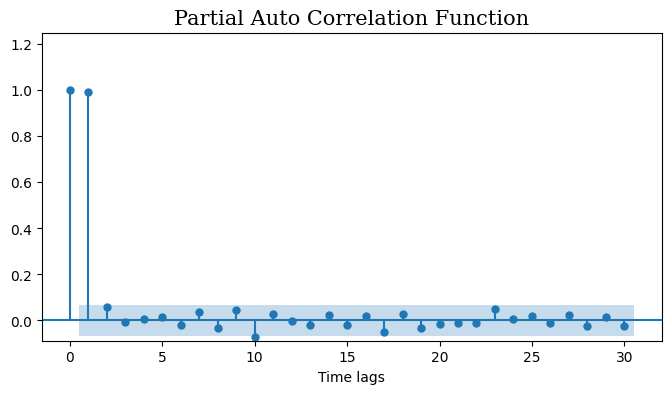

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(np.log(apple.Close), auto_ylims = True, lags = 30, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

AR 차수는 기각역을 벗어난 지점인 1이 적당하다

**MA 차수 구하기**

차분 시계열의 ACF의 형태를 보고 MA의 차수를 구할 수 있다.

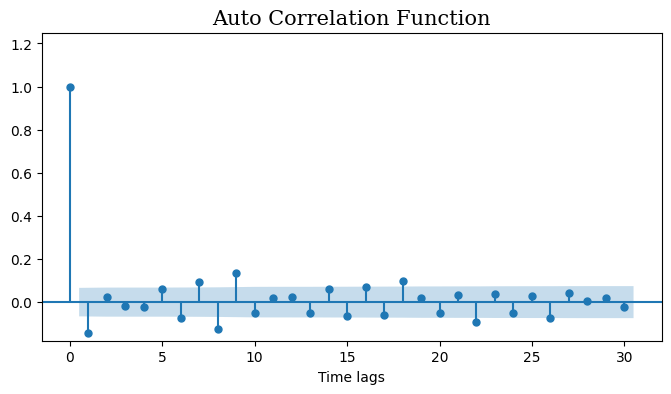

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret, auto_ylims = True, lags = 30, title = 'ACF of KOSPI return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

MA 차수는 기각역을 벗어난 1이 적절하다. 다만, 실험자의 관점에 따라서 최종적으로 기각역을 벗어나는 지점은 22로 지정하는 경우도 있으니 주의해야 한다

최종적으로, $\mbox{ARMA(1,1)}$모형을 채택하였다. `statsmodels.api`의 `ARIMA()`함수를 사용하면 fitting이 가능하다

**주의사항**
- `ARIMA()` 함수 내에는 로그화된 원 시계열을 사용해야 한다. 왜냐하면 ARMA모형은 시계열 모형이므로, 정상 확률과정인 return에 모델을 적용하는 것이 아닌 로그화된 원 시계열 데이터에 적용해야 한다
- fitting method는 보통 innovation MLE가 사용된다

In [84]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
model = sm.tsa.ARIMA(np.log(apple.Close), order = (1,0,1), trend = 'c').fit(method = 'innovations_mle')
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  879
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2106.917
Date:                Thu, 27 Jul 2023   AIC                          -4205.834
Time:                        13:30:06   BIC                          -4186.718
Sample:                             0   HQIC                         -4198.523
                                - 879                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8131      0.289     16.672      0.000       4.247       5.379
ar.L1          0.9987      0.002    534.913      0.000       0.995       1.002
ma.L1         -0.1355      0.024     -5.753      0.0

계수인 ar.L1과 ma.L1의 p-value가 0으로 나타난다.<br>
또한 Jarque-Bera 통계량의 p-value가 0으로 나타나 정규성도 뛰어나다고 볼 수 있다

Text(0.5, 1.0, 'Residual vs. Normal')

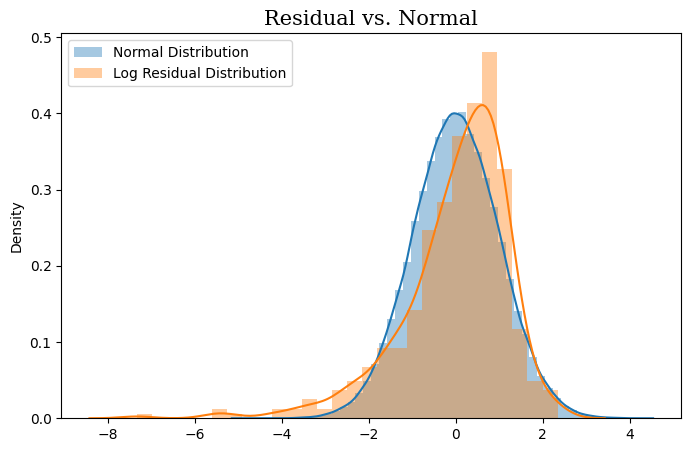

In [50]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(np.random.normal(size=100000), kde = True, ax = ax1, label = 'Normal Distribution')
sns.distplot(np.log(model.resid) - np.log(model.resid).mean() ,
             kde = True, rug = False , ax = ax1, label = 'Log Residual Distribution')
plt.legend()
plt.title('Residual vs. Normal', fontsize = 15, fontfamily = 'Serif')

시계열 모형이 제대로 추정되었는지 확인하기 위해, 잔차 분포를 꼭 확인해야 한다.

적합화된 모형의 분포를 확인한 결과, 정규분포에 비해 왜도가 약간 존재하고 첨도가 좀 더 높은 것으로 드러났다. 이는 금융 시계열 데이터 자체의 특징이다


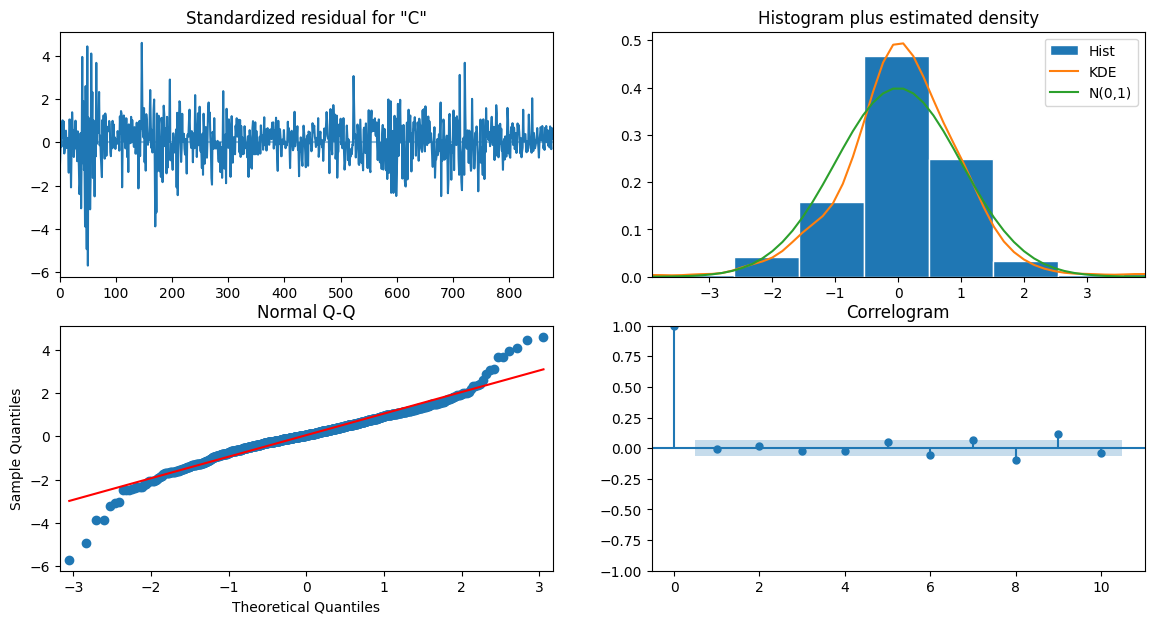

In [61]:
model.plot_diagnostics(figsize = (14,7))
plt.show()

`plot_diagnostics()` method를 사용하면 위와 같이 편리하게 모델의 정상성을 확인할 수 있다.

#### Exercise 1

2020년 1월 1일부터 2023년 6월 30일까지의 KOSPI index 데이터를 가져와 종가 데이터를 수집한 뒤, ARMA모형을 직접 추정해 보자. 그리고 추정된 모형의 정상성을 확인해 보자. 어떠한 특성을 띄는가? 잔차는 정규분포를 충족하는가? yfinance 혹은 pandas datareader 둘 중 어느것을 사용해도 상관없다

### 2. Linear Time Series Forecasting

예측은 시계열 분석 분야에서 중요한 응용 분야 중 하나이다. AR모형 뿐만 아니라, MA, ARMA, ARIMA 등 타 시계열 모형 모두 prediction이 가능하다. statsmodels에는 prediction을 위한 method가 구현이 되어 있다

$$E\{[r_{h+l}-\hat r_h(l)]^2|F_h\} \geq \min_g E[(r_{h+l} - g)^2|F_h]$$

여기서 $g$는 시간 $h$에서 이용 가능한 모든 정보의 집합이다. 즉, 예측값의 조건부 분산은 IID가정과 weak stationarity의 가정을 가지는 하에서 최소 분산의 값을 갖는 예측치이다. 이를 일반화하면 아래와 같이 설명이 가능하다

1. 분포가 IID 가정을 따르고, weak stationary한 시계열일 때, **예측값의 분산은 효율적인 최소 분산 추정치**이다
2. 분포가 IID 가정을 따르지 못하고 stationary하지 못할 때, **예측값의 분산은 최소 분산이 아닐지라도 효율적인 추정치**일 수 있다

어느 경우에도 예측된 값은 효율적인 추정치이기 때문에, 추정된 값을 사용할 수 있다(단, IID가정이 깨질 경우 편향은 어느정도 감수해야 한다)

#### 2.1 One step ahead AR model Forecasting

$\mbox{AR}(p)$모형으로부터, 현재시간이 $h$일 때 1기 이후의 모형을 다음과 같이 쓸 수 있다

$$r_{h+1} = \phi_0 + \phi_1 r_h + \cdots + \phi_p r_{h+1-p} + a_{h+1}$$

loss function이 MSE일 때, $h$기의 사용가능한 모든 정보집합 $F_h$ 하에서 $h+1$기의 조건부 예측값은 다음과 같다

$$\hat r_h(1) = E(r_{h+1}|F_h) = \phi_0 \sum_{i=1}^p \phi_i r_{h+1-i}$$

그리고 예측오류는

$$e_h(1) = r_{h+1} - \hat r_h(1) = a_{h+1}$$

이다

#### 2.2 Multistep ahead AR model Forecasting

위 과정을 일반화 하면

$$r_{h+l} = \phi_0 + \phi_1 r_{h+l-1} + \cdots + \phi_p r_{h+l-p} + a_{h+l}$$

로 표현이 가능하다.<br>
MSE 비용 함수에 기반한 $h+l-1$기의 사용가능한 모든 정보집합 $F_h$ 하에서 $h+1$기의 조건부 $l$-step-ahead 예측값은

$$\hat r_h(l) = E(r_{h+l}|F_h) = \phi_0 + \sum_{i=1}^p \phi_i \hat r_{h}(l-i)$$

이다

#### 2.3 Forecasting Using MA models

MA 모형을 이용한 예측은 쉽게 설명이 가능하다. 모형의 메모리가 한정되어 있기 때문에, 어느 한 시점에서의 예측값은 빠르게 시계열의 평균으로 회귀한다. $h$기에서 사용가능한 정보집합 $F_h$이 주어져 있다고 할 때, $\mbox{MA}(1)$모형의 1-step-ahead 예측값은

$$r_{h+1} = c_0 + a_{h+1} - \theta_1 a_h$$
이다. 추정된 예측값과 예측오차를 조건부 확률로 표기하면 다음과 같다
$$\hat r_h(1) = E(r_{h+1}|F_h) = c_0 - \theta_1 a_h$$
$$e_h(1) = r_{h+1} - \hat r_h(1) = a_{h+1}$$

여기에서, 1-step-ahead 예측오차의 분산은 $\mbox{Var}[e_h(1)] = \sigma_a^2$이다. 더 나아가 2-step-ahead 예측치는 다음과 같이 표기할 수 있다

$$r_{h+2} = c_0 + a_{h+2} - \theta_1 a_{h+1}$$

여기서 우리는 다음과 같이 예측값과 예측오차의 추정치는 다음과 같다

$$\hat r_h(2) = E(r_{h+2}|F_h) = c_0$$
$$e_h(2) = r_{h+2} - \hat r_h(2) = a_{h+2} - \theta_1a_{h+1}$$

2-step-ahead 예측오차의 분산은 $\mbox{Var}[e_h(2)] = (1+\theta_1^2)\sigma_a^2$이다.이는 모형의 분산이고 1-step-ahead 예측 오차의 분산보다 크거나 같다

유사하게, $\mbox{MA}(2)$모형은
$$r_{h+2} = c_0 + a_{h+l} - \theta_1 a_{h+l-1} - \theta_2 a_{h+l-2}$$
이다. 이로부터 우리는
$$\hat r_h(1) = c_0 - \theta_1 a_h - \theta_2 a_{h-1}$$
$$\hat r_h(2) = c_0 - \theta_2 a_h$$
$$\hat r_h(l) = c_0, ~~~~ \mbox{for} ~~ l>2$$
인 것을 알 수 있다. 즉, $\mbox{MA}(2)$모형의 multistep-ahead 예측치는 2 step 이후이다.

이를 일반화하면, $\mbox{MA}(q)$모형의 multistep-ahead 예측치는 $q$ step 이후에 평균으로 수렴하게 된다

#### 2.4 Forecasting using an ARMA models

$\mathrm{ARMA}(p,q)$ 모델은

$$r_t = \phi_0 + \sum_{i=1}^p \phi_i r_{t-i} + a_t - \sum_{i=1}^q \theta_i a_{t-i}$$
이다. ARMA모형의 예측은 AR모형과 유사한데, $r_{h+1}$의 1-step-ahead 예측치는 다음과 같이 쉽게 표현될 수 있다

$$\hat r_h(1) = E(r_{h+1}|F_h) = \phi_0 + \sum_{i=1}^p \phi_i r_{h+1-i} - \sum_{i=1}^q \theta_i a_{h+1-i}$$

그리고 연관된 예측 오차는 $e_h(1) = r_{h+1} - \hat r_h(1) = a_{h+1}$ 이며, 예측오차의 분산은 $\mbox{Var}[e_h(1)] = \sigma_a^2$이라 할 수 있다. 이를 일반화하여 $l$-step-ahead 예측치는 다음과 같이 표현할 수 있다

$$\hat r_h(l) = E(r_{h+l}|F_h) = \phi_0 + \sum_{i=1}^p \phi_i \hat r_h (l-i) - \sum_{i=1}^q \theta_i a_h(l-i)$$

이 경우 예측치의 오차는
$$e_h(l) = r_{h+l} - \hat r_h (l)$$
이다

#### example 2

example 1에서 추정한 Apple 주가의 차분 시계열의 ARMA모형을 사용하여 10기간 예측치를 계산하고, 1년간의 예측치를 plotting해 보자

In [107]:
forecast_steps = 10
model.forecast(steps = forecast_steps)

879    5.243831
880    5.243279
881    5.242729
882    5.242178
883    5.241629
884    5.241080
885    5.240532
886    5.239985
887    5.239438
888    5.238892
Name: predicted_mean, dtype: float64

forecast의 결과값은 index가 int형으로 초기화되기 때문에, pandas date_range 함수를 사용하여 수정하거나, 숫자형 인덱스로 통일을 시켜야 한다

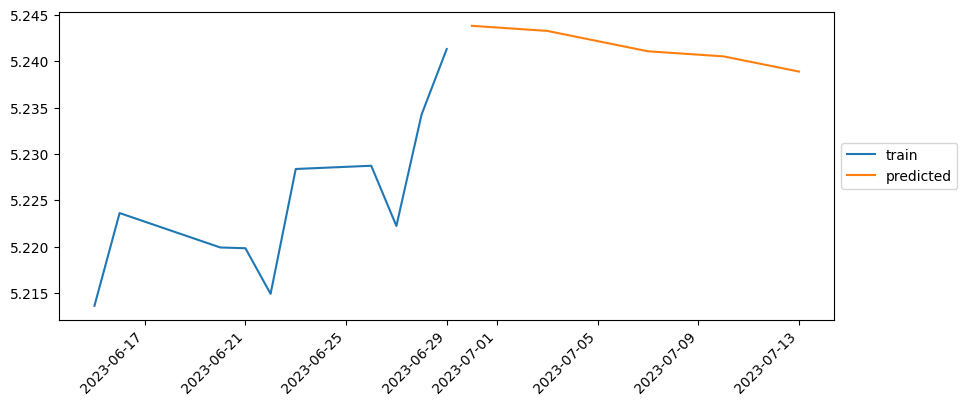

In [113]:
import pandas as pd
plt.figure(figsize = (10,4))
plt.plot(model.fittedvalues[-10:], label = 'train')
plt.plot(pd.date_range(start = '2023-06-30', periods = forecast_steps, freq='B'),
         model.forecast(steps = forecast_steps), label = 'predicted')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

예측된 값과 실제 값을 비교해 보자

In [109]:
start_date = '2023-06-30'
end_date = '2023-07-14'

apple_new= yf.download('AAPL', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


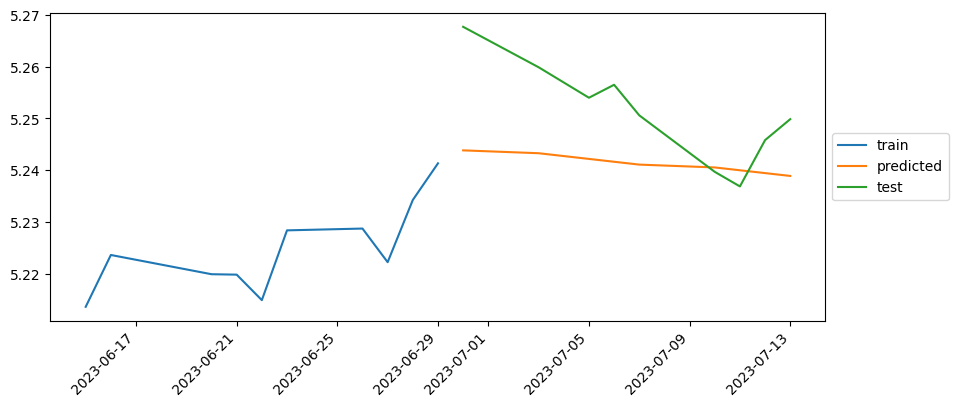

In [114]:
plt.figure(figsize = (10,4))
plt.plot(model.fittedvalues[-10:], label = 'train')
plt.plot(pd.date_range(start = '2023-06-30', periods = forecast_steps, freq='B'),
         model.forecast(steps = forecast_steps), label = 'predicted')
plt.plot(np.log(apple_new.Close), label = 'test')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

예측에 대한 분산은 **편향이 있고 최소 분산 추정치는 아니지만, 효율적인 추정량**임을 잊지 말아야 한다

#### Exercise 2

Exercise 1에서 추정한 모형을 가지고 오자. 20기간의 예측을 시행하라. 그리고 실제 값과 비교해 보라. 어떤 차이가 있는가? 예측값은 효율적인 추정량인가?